# Î™®Îç∏2
- ÌÖçÏä§Ìä∏Î•º Î≥¥Í≥† ÌõÑÎ≥¥Ïûê ÏòàÏ∏°
- ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞(Feature)
    - Í∏∞ÏÇ¨Ï†úÎ™©+ÎåìÍ∏ÄÎÇ¥Ïö©
- Ï∂úÎ†• Îç∞Ïù¥ÌÑ∞(Label)
    - Î∞ïÏòÅÏÑ†
    - Ïò§ÏÑ∏Ìõà
    - ÍπÄÏòÅÏ∂ò
    - Î∞ïÌòïÏ§Ä

In [1]:
# Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
import missingno
import re
import os
# Îç∞Ïù¥ÌÑ∞
from sklearn.datasets import load_iris

# Í≤ΩÍ≥†Î©îÏãúÏßÄ Ï†úÍ±∞
import warnings 
warnings.filterwarnings('ignore')

# KFold
from sklearn.model_selection import KFold # ÏàúÏÑúÎåÄÎ°ú ÌïòÍ±∞ÎÇò or ÎûúÎç§ÌïòÍ≤å ÌÅ¥ÎûòÏä§Î•º ÎÇòÎààÎã§.
from sklearn.model_selection import StratifiedKFold # Í≤∞Í≥ºÎç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Í∞Å ÌÅ¥ÎûòÏä§Í∞Ä Í∑†Îì±Ìïú ÎπÑÏú®Î°ú Îì§Ïñ¥ÏûàÍ≤åÎÅî ÎÇòÎààÎã§.

# ÍµêÏ∞®Í≤ÄÏ¶ù Ìï®Ïàò
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞Î°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
    
# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Ï∂îÍ∞ÄÌï≠Î™©
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# ÎπÑÏßÄÎèÑÌïôÏäµ - Íµ∞Ïßë
from sklearn.cluster import KMeans
from sklearn.cluster import mean_shift

# Îî•Îü¨Îãù
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf

# CNN
from keras.utils import np_utils
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, Conv1D
from keras.layers import MaxPooling2D, MaxPooling1D

# NLP
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Î¨∏Ïû•ÏùÑ Îã®Ïñ¥ Îã®ÏúÑÎ°ú ÎÇòÎàÑÍ∏∞
from keras.preprocessing.text import text_to_word_sequence
from keras.layers import Embedding

# Îã§Ï§ëÎ∂ÑÎ•òÎ•º ÏúÑÌïú Ïõê-Ìï´ Ïù∏ÏΩîÎçî
from keras.utils import to_categorical

# ÎçîÏù¥ÏÉÅ ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÎäîÎã§Î©¥ Ï°∞Í∏∞ Ï§ëÎã®ÏãúÌÇ¨ Ïàò ÏûàÎäî Ìï®Ïàò
from keras.callbacks import EarlyStopping

# epochÎßàÎã§ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
from keras.callbacks import ModelCheckpoint

# ÌååÏùºÎ°ú Ï†ÄÏû•Îêú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ Í∞ùÏ≤¥Î°ú Î≥µÍµ¨ÌïòÎäî Ìï®Ïàò
from keras.models import load_model

# Ï†ÄÏû•
import pickle

# ÏãúÍ∞Ñ Î™®Îìà
import time # ÌòÑÏû¨ ÏãúÍ∞ÑÍ∞íÏùÑ Íµ¨Ìï† Ïàò ÏûàÎã§.

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# GPU Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÎüâÏùÑ ÌïÑÏöîÌïú ÎßåÌÅºÎßå Ï¶ùÍ∞ÄÌïòÎèÑÎ°ù ÏÑ§Ï†ï

# ÏÇ¨Ïö©Í∞ÄÎä•Ìïú GPU Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # ÌïÑÏöîÌïú ÎßåÌÅºÎßå Î©îÎ™®Î¶¨Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÏÑ§Ï†ïÌïòÍ∏∞
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# RandomSeed
np.random.seed(1)

## 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
df = pd.read_csv('./data/Ïû¨Î≥¥Í∂êÏÑ†Í±∞ÎåìÍ∏ÄÎç∞Ïù¥ÌÑ∞_ÏµúÏ¢Ö_Ï†ÑÏ≤òÎ¶¨ÏôÑÎ£å.csv')
print(df.shape)
df.head()

(144139, 12)


Ï†úÎ™©                   ÎÇ†Ïßú  \
0  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞?  2021-03-07 05:57:00   
1  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞?  2021-03-07 05:57:00   
2  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞?  2021-03-07 05:57:00   
3  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞?  2021-03-07 05:57:00   
4  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞?  2021-03-07 05:57:00   

                   ÏûëÏÑ±Ïùº                                                 ÎåìÍ∏Ä  \
0  2021-03-12 19:13:00                    Ï≤†ÏàòÏïº! Îú∏ Îì§Ïù¥ÏßÄ ÎßêÍ≥† Ïï†Íµ≠ÌïòÎäî ÎßàÏùåÏúºÎ°ú Î¨ºÎü¨ÏÑúÎùº~~~   
1  2021-03-09 13:49:00  Î∞ïÏòÅÏÑ†ÏùÄ Ï†ïÎèôÏòÅÏù¥ ÏñªÏùÄ 36ÌîÑÎ°úÏÑ†Ïóê Î®∏Î¨¥Î•ºÍ≤É. 4.7.Ïù¥ÌõÑ OOOÏ†ïÍ∂åÏùÄ Î™∞ÎùΩÏùò Í∏∏ ...   
2  2021-03-07 14:42:00                      ÎπµÏÑ†Ïù¥Í∞ÄÏÑúÏö∏ÏãúÏû•ÎêòÎ©¥ÏÑúÏö∏ÏùÄÍ≥µÏÇ∞Íµ≠Í∞ÄÏàòÎèÑÏ†ú2ÏùòÌèâÏñëÏù¥Îê†Í≤ÉÏù¥Îã§   
3  2021-03-07 14:38:00  ÏÑúÏö∏ÏãúÏû•ÌõÑÎ≥¥ÎçîÎì¨ÎãπÎ∞ïÎπµÏÑ†Ïù¥ÎäîÏ†àÎåÄÎ°úÏÑúÏö∏ÏãúÏû•ÏùÑÌï†ÏàòÏóÜÎã§Ïù¥Ïú†ÎäîÍ∞ÄÏ°±ÏùÄÎØ∏Íµ≠.ÏòÅÍµ≠Ïóê ÏòÅÏ£ºÍ∂åÏûêÏù¥ÎØÄÎ°ú...   
4  2021-03-07 14:02:00  Î∂ÄÏÇ∞ÏùÄÏò§Í±∞ÎèàÏÑ†Í±∞Ïù¥Í≥† Ïò§Í±∞ÎèàÏπòÎ∂ÄÏÑ†Í±∞ÏïÑÎãåÍ∞Ä Ïò§Í±∞ÎèàÏóê ÏÑ±Ï∂îÌï¥ÏúºÎ°ú ÏÉùÍ∏¥ÏÑ†Í±∞Í∞Ä Í∞ÄÎèÖÎèÑÏã†Í≥µÌï≠ÏùÄ...   

     Ï∂úÏ≤ò  ÏßÄÏó≠(ÏÑúÏö∏:1, Î∂ÄÏÇ∞:2)  Ï†ïÎãπ(1:ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ,2:Íµ≠ÎØºÏùòÌûò)  Ï†ïÎãπÌèâÍ∞Ä(Î∂ÄÏ†ï;0, Í∏çÏ†ï:1)  ÌõÑÎ≥¥(Í∏∞Ìò∏ Ïàú)  \
0  Ï°∞ÏÑ†ÏùºÎ≥¥             NaN                  NaN               NaN       NaN   
1  Ï°∞ÏÑ†ÏùºÎ≥¥             1.0                  NaN               NaN       1.0   
2  Ï°∞ÏÑ†ÏùºÎ≥¥             1.0                  NaN               NaN       1.0   
3  Ï°∞ÏÑ†ÏùºÎ≥¥             1.0                  1.0               0.0       1.0   
4  Ï°∞ÏÑ†ÏùºÎ≥¥             2.0                  1.0               0.0       NaN   

   ÌõÑÎ≥¥ÌèâÍ∞Ä(Î∂ÄÏ†ï;0, Í∏çÏ†ï:1)                                               Ï†úÎ™©ÎåìÍ∏Ä  \
0               NaN  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞? Ï≤†ÏàòÏïº! Îú∏ Îì§Ïù¥...   
1               0.0  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞? Î∞ïÏòÅÏÑ†ÏùÄ Ï†ïÎèôÏòÅÏù¥...   
2               0.0  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞? ÎπµÏÑ†Ïù¥Í∞ÄÏÑúÏö∏ÏãúÏû•Îêò...   
3               0.0  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞? ÏÑúÏö∏ÏãúÏû•ÌõÑÎ≥¥ÎçîÎì¨Îãπ...   
4               NaN  [Ïû¨Î≥¥Í∂ê D-31] Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä, ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞? Î∂ÄÏÇ∞ÏùÄÏò§Í±∞ÎèàÏÑ†Í±∞Ïù¥...   

                                            Ï†ÑÏ≤òÎ¶¨ Ï†úÎ™©ÎåìÍ∏Ä  
0  Ïû¨Î≥¥Í∂ê D31 Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Ï≤†ÏàòÏïº Îú∏ Îì§Ïù¥ÏßÄ ÎßêÍ≥† Ïï†...  
1  Ïû¨Î≥¥Í∂ê D31 Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Î∞ïÏòÅÏÑ†ÏùÄ Ï†ïÎèôÏòÅÏù¥ ÏñªÏùÄ 3...  
2  Ïû¨Î≥¥Í∂ê D31 Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Îπµ ÏÇ∞ Ïù¥Í∞Ä ÏÑúÏö∏ÏãúÏû• ÎêòÎ©¥...  
3  Ïû¨Î≥¥Í∂ê D31 Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ ÏÑúÏö∏ÏãúÏû• ÌõÑÎ≥¥ Îçî Îì† ÎåÄÏπò...  
4  Ïû¨Î≥¥Í∂ê D31 Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò vs Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Î∂ÄÏÇ∞ÏùÄ Ïò§Í±∞Îèà ÏÑ†Í±∞Ïù¥Í≥† Ïò§...

## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- ÌõÑÎ≥¥ÏûêÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [5]:
# ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞
df2 = df[['ÏßÄÏó≠(ÏÑúÏö∏:1, Î∂ÄÏÇ∞:2)', 'ÌõÑÎ≥¥(Í∏∞Ìò∏ Ïàú)', 'ÌõÑÎ≥¥ÌèâÍ∞Ä(Î∂ÄÏ†ï;0, Í∏çÏ†ï:1)',
          'Ï†ïÎãπ(1:ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ,2:Íµ≠ÎØºÏùòÌûò)', 'Ï†ïÎãπÌèâÍ∞Ä(Î∂ÄÏ†ï;0, Í∏çÏ†ï:1)', 'Ï†ÑÏ≤òÎ¶¨ Ï†úÎ™©ÎåìÍ∏Ä']]
df2.columns = ['area', 'candidate', 'candidate_eval',
               'party', 'party_eval', 'title_comment']

# ÌõÑÎ≥¥ÏûêÎ•º Íµ¨Î≥ÑÌïòÏó¨ 'area_candidate' Ïª¨ÎüºÏóê Í∞Å ÌõÑÎ≥¥Ïûê Ïù¥Î¶Ñ Ï∂îÍ∞Ä

# ÌõÑÎ≥¥ÏûêÎ≥Ñ Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
ys_idx = df2.query('area == 1.0 & candidate == 1.0').index  # Î∞ïÏòÅÏÑ†
sh_idx = df2.query('area == 1.0 & candidate == 2.0').index  # Ïò§ÏÑ∏Ìõà
yc_idx = df2.query('area == 2.0 & candidate == 1.0').index  # ÍπÄÏòÅÏ∂ò
hj_idx = df2.query('area == 2.0 & candidate == 2.0').index  # Î∞ïÌòïÏ§Ä
etc_idx = df2.query('candidate == 5.0').index  # Í∏∞ÌÉÄ

# 'area_candidate'Ïª¨ÎüºÏóê ÌõÑÎ≥¥Ïûê Ïù¥Î¶ÑÍ∞í Ï∂îÍ∞Ä
df2['area_candidate'] = np.nan
df2['area_candidate'][ys_idx] = 'Î∞ïÏòÅÏÑ†'
df2['area_candidate'][sh_idx] = 'Ïò§ÏÑ∏Ìõà'
df2['area_candidate'][yc_idx] = 'ÍπÄÏòÅÏ∂ò'
df2['area_candidate'][hj_idx] = 'Î∞ïÌòïÏ§Ä'
df2['area_candidate'][etc_idx] = 'Í∏∞ÌÉÄ'

In [6]:
# Îç∞Ïù¥ÌÑ∞ Ï¢ÖÎ•òÎ≥Ñ Í∞úÏàò ÌôïÏù∏
print(f'Ï¥ù ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïàò: {df2["area_candidate"].value_counts().sum()}')
pd.DataFrame(df2['area_candidate'].value_counts())

Ï¥ù ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïàò: 4332


area_candidate
Í∏∞ÌÉÄ             1611
Î∞ïÏòÅÏÑ†            1303
Ïò§ÏÑ∏Ìõà            1178
Î∞ïÌòïÏ§Ä             211
ÍπÄÏòÅÏ∂ò              29

# 3. Îã§Ï§ëÎ∂ÑÎ•ò
- **ÌôúÏÑ±Ìôî Ìï®Ïàò**Î•º **Ïù¥Ïö©**ÌïòÎ†§Î©¥ YÍ∞íÏù¥ **0-1Î°ú Ïù¥Î£®Ïñ¥Ï†∏** ÏûàÏñ¥Ïïº Ìï®
    - Ïõê-Ìï´ Ïù∏ÏΩîÎî©(One-Hot Encoding)

## 3.1 ÌïôÏäµÌï† ÌÖçÏä§Ìä∏(docs) ÏßÄÏ†ï

In [7]:
# ÌïúÍ∏Ä Ï†ïÍ∑úÌëúÌòÑÏãù
def text_cleaning(text) :
    hangul = re.compile('[^ „Ñ±-„Ö£Í∞Ä-Ìû£]+')
    result = hangul.sub('', str(text))
    return result

In [8]:
# ÌïúÍ∏Ä Ïô∏ Î¨∏ÏûêÏó¥ Í≥µÎ∞±Ï≤òÎ¶¨
df2['title_comment'] = df2['title_comment'].apply(lambda x: text_cleaning(x))

In [9]:
# ÌõÑÎ≥¥ÏûêÎ•º 5Í∞ÄÏßÄÎ°ú Î∂ÑÎ¶¨Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Ïàò
notnull_idx = df2[ df2['area_candidate'].notnull() ].index

# ÌõÑÎ≥¥Ïûê ÏòàÏ∏°Ïóê ÏÇ¨Ïö©Îê† feature ÌÖçÏä§Ìä∏ ÏÑ†Ï†ï
docs = df2['title_comment'][notnull_idx].to_list()
len(docs) # Ï¥ù ÎùºÎ≤®ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ÏàòÎûë Í∞ôÏïÑÏïºÌï®.

4332

## 3.2  yÍ∞í Î¨∏ÏûêÏó¥ Encoding

In [10]:
# Î¨∏ÏûêÏó¥ Ïù∏ÏΩîÎî©
encoder = LabelEncoder()

# ÌõÑÎ≥¥Í∞íÏùÑ LabelEncoding
y = encoder.fit_transform(df2['area_candidate'][notnull_idx].values)
y

array([2, 2, 2, ..., 4, 0, 4])

In [11]:
# Ïù∏ÏΩîÎî©Í∞í ÌôïÏù∏
print( encoder.classes_ )
print( encoder.inverse_transform([0]) )
print( encoder.inverse_transform([1]) )
print( encoder.inverse_transform([2]) )
print( encoder.inverse_transform([3]) )
print( encoder.inverse_transform([4]) )

['Í∏∞ÌÉÄ' 'ÍπÄÏòÅÏ∂ò' 'Î∞ïÏòÅÏÑ†' 'Î∞ïÌòïÏ§Ä' 'Ïò§ÏÑ∏Ìõà']
['Í∏∞ÌÉÄ']
['ÍπÄÏòÅÏ∂ò']
['Î∞ïÏòÅÏÑ†']
['Î∞ïÌòïÏ§Ä']
['Ïò§ÏÑ∏Ìõà']


## 3.3  yÍ∞í One-Hot Encoding
- Ï∂úÎ†•Ï∏µ nodeÏùò Í∞úÏàòÎäî **5Í∞ú**Î°ú ÎßûÏ∂∞Ï£ºÍ∏∞

In [12]:
y_encoded = to_categorical(y)
y_encoded.shape 

(4332, 5)

In [13]:
y_encoded # ‚≠êÏ∂úÎ†•Ï∏µ ÎÖ∏ÎìúÏùò Í∞úÏàòÎäî 5Î°ú ÎßûÏ∂∞Ï£ºÍ∏∞‚≠ê

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

## 3.4 Tokenizer
- ÌÖçÏä§Ìä∏Î•º ÏûòÍ≤å ÎÇòÎàÑÎäî Í≤É
- Îã®Ïñ¥Î≥Ñ, Î¨∏Ïû•Î≥Ñ, ÌòïÌÉúÏÜåÎ≥Ñ, ...
- Ïù¥Î†áÍ≤å ÎÇòÎàÑÏñ¥ÏßÑ ÌïòÎÇòÏùò Îã®ÏúÑÎ•º **Token(ÌÜ†ÌÅ∞)**


- **ÎπàÎèÑÏóê Îî∞Îùº Î≤àÌò∏Í∞Ä Ï†ïÌï¥ÏßÄÎèÑÎ°ù ÎßåÎì§Í∏∞**
    - Tokenizer(num_words=5000): ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ ÌÜ†ÌÅ∞Îì§ Ï§ë 5000Í∞ú ÌÜ†ÌÅ∞Îßå ÏÑ†ÌÉùÌï¥ÏÑú Í∞ÄÏ†∏Ïò§Í∏∞

In [96]:
# ÎπàÎèÑÍ∞Ä ÎÜíÏùÄ Îã®Ïñ¥Îì§Î°ú Íµ¨ÏÑ±
num_word = 5000

token = Tokenizer(num_words=num_word) # ÌÜ†ÌÅ∞Ìôî Ìï®Ïàò ÏßÄÏ†ï
token.fit_on_texts(docs) # ÌÜ†ÌÅ∞Ìôî Ìï®ÏàòÏóê Î¨∏Ïû• Ï†ÅÏö©
token.word_index # Í∞Å Îã®Ïñ¥Ïóê Îß§Í≤®ÏßÑ Ïù∏Îç±Ïä§Í∞í Ï∂úÎ†•

{'Î∞ïÏòÅÏÑ†': 1,
 'Ïò§ÏÑ∏Ìõà': 2,
 'Îã§': 3,
 'ÏïàÏ≤†Ïàò': 4,
 'ÏÑúÏö∏ÏãúÏû•': 5,
 'Î¨∏Ïû¨Ïù∏': 6,
 'Ìïú': 7,
 'Ïïà': 8,
 'ÌõÑÎ≥¥': 9,
 'Ïù¥': 10,
 'Î≥¥Í∂êÏÑ†Í±∞': 11,
 'Î™ª': 12,
 'ÎÇ¥Í≥°Îèô': 13,
 'Îã®ÏùºÌôî': 14,
 'ÎïÖ': 15,
 'Ï≤úÏïàÌï®': 16,
 'Ïù¥Í≤å': 17,
 'Ïú†ÏäπÎØº': 18,
 'Ï∞∏ÏÑù': 19,
 'Ï∂îÎ™®Ïãù': 20,
 'Í≤É': 21,
 'Íµ≠ÎØºÏùò': 22,
 'ÎçîÎ∂àÏñ¥ÎØºÏ£ºÎãπ': 23,
 'ÎåÄÌÜµÎ†π': 24,
 'ÌõÑÎ≥¥Ïûê': 25,
 'ÌÜ†Î°†Ìöå': 26,
 'ÎÇòÎùºÎÉê': 27,
 'Î≤à': 28,
 'ÌïòÌÉúÍ≤Ω': 29,
 'Ïàò': 30,
 'ÏûàÎäî': 31,
 'ÌÜ†Î°†': 32,
 'ÌïòÎäî': 33,
 'Í∑∏': 34,
 'ÎÖÑ': 35,
 'Î∞ïÌòïÏ§Ä': 36,
 'Îã§Ïãú': 37,
 'ÌïúÎã§': 38,
 'ÏÑ†Í±∞': 39,
 'Ï£ºÏòÅÏßÑÏùò': 40,
 'Îâ¥Ïä§Î∏åÎ¶¨Ìïë': 41,
 'Í≤å': 42,
 'Îçî': 43,
 'Ïù¥Îü∞': 44,
 'Ìï†': 45,
 'Ìöå': 46,
 'ÎãπÏã†Ïùò': 47,
 'ÏÑúÏö∏': 48,
 'ÏóÜÎäî': 49,
 'ÏÑ†ÌÉùÏùÄ': 50,
 'Î∂ÑÌÜ†Î°†': 51,
 'Îòê': 52,
 'Ïôú': 53,
 'ÏõêÏù∏Ï≤´': 54,
 'Ïñ¥Îï†ÎÇò': 55,
 'Îïå': 56,
 'Î¨ºÏóàÎã§': 57,
 'Î∂ÄÏÇ∞ÏãúÏû•': 58,
 'Í≤ÉÏù¥Îã§': 59,
 'ÏïºÎãπ': 60,
 'Ï†Ñ': 61,
 'Í≤ÉÏù¥': 62,
 'Í±¥': 63,
 'ÏôÄ': 64

In [97]:
len(token.word_index) # Ï†ÑÏ≤¥ ÌÜ†ÌÅ∞ Í∞úÏàòÎäî 30503

30503

In [98]:
# ÏïûÏÑú ÎßåÎì† ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î°úÎßå Ï±ÑÏõåÏßÑ ÏÉàÎ°úÏö¥ Î∞∞Ïó¥ ÏÉùÏÑ±
X = token.texts_to_sequences(docs)
print(X[0])  # ÌÜ†ÌÅ∞Ìôî ÌõÑ Ïù∏Îç±Ïä§Î°ú Ï±ÑÏõåÏßÑ ÏÉàÎ°úÏö¥ Î∞∞Ïó¥
print(docs[0])  # ÌÜ†ÌÅ∞Ìôî Ï†Ñ Ïã§Ï†ú Î¨∏Ïû•Ïùò Î∞∞Ïó¥

[785, 68, 70, 36, 1659, 1409, 1006, 479, 3316, 1221, 21, 1660, 682, 877, 59]
Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Î∞ïÏòÅÏÑ†ÏùÄ Ï†ïÎèôÏòÅÏù¥ ÏñªÏùÄ  ÌîÑÎ°ú ÏÑ†Ïóê Î®∏Î¨¥Î•º Í≤É  Ïù¥ÌõÑ  Ï†ïÍ∂åÏùÄ Î™∞ÎùΩÏùò Í∏∏ ÌéòÎã¨ÏùÑ Í∏âÏÜçÌûà Î∞üÏùÑ Í≤ÉÏù¥Îã§


### ü§ó Î¨∏Ïû•Î≥Ñ ÌÜ†ÌÅ∞ Í∞úÏàò ÌååÏïÖ
- ÏµúÎåÄ ÌÜ†ÌÅ∞ÏàòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥

In [99]:
# Í∞Å ÌÜ†ÌÅ∞ÏúºÎ°ú Ï±ÑÏõåÏßÑ Î∞∞Ïó¥ÏóêÏÑú ÏµúÎåÄ ÌÜ†ÌÅ∞Ïàò Ï∞æÍ∏∞
max_len = 0
for i in X:
    if max_len <= len(i):
        max_len = len(i)
        
max_len

529

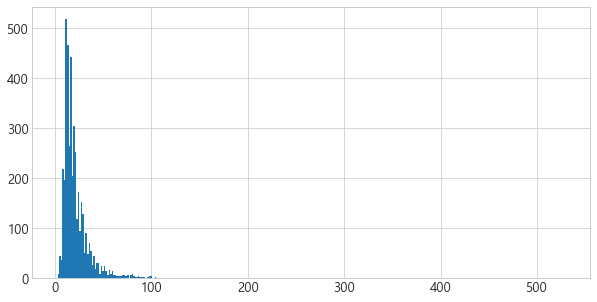

In [100]:
# Î¨∏Ïû•Î≥Ñ ÌÜ†ÌÅ∞ Í∞úÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏
total_token_count = []
for i in X:
    total_token_count.append(len(i))

plt.hist( total_token_count, bins='auto' )
plt.show()

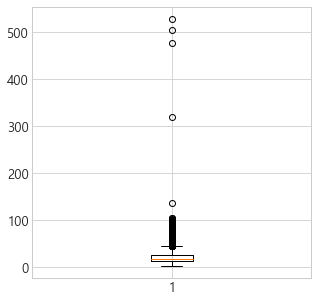

In [101]:
plt.figure(figsize=(5,5))
plt.boxplot(total_token_count)
plt.show() 

In [102]:
total_token_count.sort(reverse=True)
total_token_count[:10]

[529, 506, 477, 321, 136, 105, 105, 102, 101, 100]

- Ìïú Î¨∏Ïû•Ïùò ÏµúÎåÄ ÌÜ†ÌÅ∞Í∞úÏàòÏù∏ [955, 944, 842, 529, 228]Í∞úÎäî Í∑πÎã®ÏπòÎùºÍ≥† Î≥º Ïàò ÏûàÏùå
- ÌÜ†ÌÅ∞Ïùò ÏàòÍ∞Ä [955, 944, 842, 529, 228]Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏

In [103]:
# ÌÜ†ÌÅ∞ Í∞úÏàòÏùò Î∂ÑÌè¨ ÌôïÏù∏
pd.DataFrame(total_token_count, columns=['len(tokens)']).describe() 

len(tokens)
count  4332.000000
mean     21.856879
std      19.303906
min       3.000000
25%      13.000000
50%      17.000000
75%      26.000000
max     529.000000

In [104]:
# ÌÜ†ÌÅ∞ Í∞úÏàòÏùò 95% ÌôïÏù∏
max_len = int(pd.Series(total_token_count).quantile(0.95) )
max_len

49

- **Ìå®Îî©(padding)** Ïãú ÎßûÏ∂∞Ï£ºÎäî Î∞∞Ïó¥Ïùò Í∏∏Ïù¥Îäî ÌÜ†ÌÅ∞Ïùò ÏµúÎåÄÍ∏∏Ïù¥ **163**Î°ú ÎßûÏ∂∞Ï§ÄÎã§.
- **ÏûÑÎ≤†Îî©(embedding)** Ïãú Î∞∞Ïó¥ÏùÑ ÏïïÏ∂ïÌï† Îïå ÏÇ¨Ïö©ÌïòÎäî Í∏∏Ïù¥Îäî Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 95%Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäî ÌÜ†ÌÅ∞Ïùò ÏàòÏù∏ **70**Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏïïÏ∂ïÌïúÎã§.

## 5. Ìå®Îî©(Padding)
- **Îî•Îü¨Îãù Î™®Îç∏**Ïóê **ÏûÖÎ†•**ÏùÑ ÌïòÎ†§Î©¥ **ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Í∞Ä ÎèôÏùº**Ìï¥ÏïºÌï®. Ìå®Îî©ÏùÄ Í∏∏Ïù¥Î•º ÎßûÏ∂∞Ï£ºÎäî ÏûëÏóÖ
- ÏõêÌïòÎäî Í∏∏Ïù¥Î≥¥Îã§ ÏßßÏùÄ Î∂ÄÎ∂ÑÏùÄ Ïà´Ïûê 0ÏùÑ ÎÑ£Ïñ¥ Ï±ÑÏö∞Í≥†,Í∏¥ Îç∞Ïù¥ÌÑ∞Îäî ÏûòÎùºÏÑú Í∞ôÏùÄ Í∏∏Ïù¥Î°ú ÎßûÏ∂òÎã§.
- Ìïú Î¨∏Ïû•Ïùò ÌÜ†ÌÅ∞ Í∞úÏàò Ìï©Ïù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤ÉÏúºÎ°ú Ï±ÑÏö∞Îäî Í≤ÉÏù¥ Ï¢ãÎã§.
- Îî∞ÎùºÏÑú, ÏÑúÎ°ú Îã§Î•∏ Í∏∏Ïù¥Ïùò Îç∞Ïù¥ÌÑ∞Î•º **163**Î°ú ÎßûÏ∂òÎã§.

In [63]:
padded_x = pad_sequences(X, max_len)
padded_x # Î∞∞Ïó¥Ïùò Í∏∏Ïù¥Í∞Ä ÎßûÏ∂∞Ïßê

array([[   0,    0,    0, ...,  682,  877,   59],
       [   0,    0,    0, ..., 1661,  107,   59],
       [   0,    0,    0, ..., 1518, 2362, 4249],
       ...,
       [   0,    0,    0, ...,  752,   30,  580],
       [   0,    0,    0, ...,  829, 3269,   83],
       [   0,    0,    0, ...,    8,  197,  506]])

## 6. ÏûÑÎ≤†Îî©(Embedding)
- **Ï£ºÏñ¥ÏßÑ Î∞∞Ïó¥ÏùÑ Ï†ïÌï¥ÏßÑ Í∏∏Ïù¥Î°ú ÏïïÏ∂ï**
- ÌÖçÏä§Ìä∏Î•º Ïõê-Ìï´ Ïù∏ÏΩîÎî© Ïãú Î≤°ÌÑ∞Ïùò Í∏∏Ïù¥Í∞Ä ÎÑàÎ¨¥ Í∏∏Ïñ¥ÏßÄÎäî Î¨∏Ï†ú Ìï¥Í≤∞


- **Embedding**( ÏûÖÎ†•, Ï∂úÎ†•, Îã®Ïñ¥Ïàò )
    - **ÏûÖÎ†•**: Ï¥ù Î™á Í∞úÏùò Îã®Ïñ¥ ÏßëÌï©
    - **Ï∂úÎ†•**: Î™á Í∞úÏùò ÏûÑÎ≤†Îî© Í≤∞Í≥º ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ(ÏûÑÏùò) -> ÌÜ†ÌÅ∞ Î∞∞Ïó¥Ïùò 95%Î•º Ï∞®ÏßÄÌïòÎäî 70ÏúºÎ°ú ÏÑ§Ï†ï
    - **Îã®Ïñ¥Ïàò**: Îß§Î≤à ÏûÖÎ†•Îê† Îã®Ïñ¥ ÏàòÎäî Î™á Í∞úÎ°ú Ìï† Í≤ÉÏù∏ÏßÄ

In [64]:
# Ï¥ù Î™á Í∞úÏùò 'Ïù∏Îç±Ïä§'Í∞Ä 'ÏûÖÎ†•' ÎêòÏñ¥Ïïº ÌïòÎäîÏßÄ Ï†ïÌïòÍ∏∞
word_size = len(token.word_index) + 1 # Ï†ÑÏ≤¥ Îã®Ïñ¥ Îß® ÏïûÏóê 0Ïù¥ Î®ºÏ†Ä ÎÇòÏôÄÏïº Ìï®.
word_size

30504

## 7. Î™®Îç∏ Íµ¨Ï°∞ ÏÉùÏÑ±/ÌïôÏäµ Î∞è Ï†ÄÏû•
- 1. Í∏∞Î≥∏ Îî•Îü¨Îãù
- 2. RNN(Recurrent Neural network, RNN)
    - **Ïó¨Îü¨Í∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏàúÏÑúÎåÄÎ°ú ÏûÖÎ†•**ÎêòÏóàÏùÑ Îïå ÏïûÏÑú ÏûÖÎ†•Î∞õÏùÄ Îç∞Ïù¥ÌÑ∞Î•º **Ïû†Ïãú Í∏∞Ïñµ**Ìï¥ÎÜìÎäî Î∞©Î≤ï. Í∑∏Î¶¨Í≥† Í∏∞ÏñµÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏñºÎßàÎÇò **Ï§ëÏöîÌïúÏßÄÎ•º ÌåêÎã®**ÌïòÏó¨ **Î≥ÑÎèÑÏùò Í∞ÄÏ§ëÏπò**Î•º Ï§òÏÑú Îã§Ïùå Îç∞Ïù¥ÌÑ∞Î°ú ÎÑòÍ∏∞Í≤å Îê®
    - **LSTM(Long Short Term Memory)**
        - RNNÏùò Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÎùºÎäî Îã®Ï†êÏùÑ Î≥¥ÏôÑÌïú Î∞©Î≤ï
        - Ï¶â, Î∞òÎ≥µÎêòÍ∏∞ ÏßÅÏ†ÑÏóê Îã§Ïùå Ï∏µÏúºÎ°ú Í∏∞ÏñµÎêú Í∞íÏùÑ ÎÑòÍ∏∏ÏßÄ Ïïà ÎÑòÍ∏∏ÏßÄÎ•º Í¥ÄÎ¶¨ÌïòÎäî Îã®Í≥Ñ Ï∂îÍ∞Ä
- 3. CNNÍ≥º LSTM

### 7.1 DNN

In [65]:
word_size = num_word

In [26]:
# DNN ÏÑ§Ï†ï
model = Sequential()
model.add(Embedding( num_word, 8 , input_length=max_len ) )
model.add(Flatten())
model.add(Dense(5, activation='softmax')) # Îã§Ï§ëÎ∂ÑÎ•ò

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile( loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
             )

# Î™®Îç∏ Ï†ÄÏû• Ï°∞Í±¥ ÏÑ§Ï†ï
model_path = 'model/DNN_0511_2218/{epoch}-{val_loss}.h5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                               verbose=1,
                               save_best_only=True)
# ÌïôÏäµ ÏûêÎèô Ï§ëÎã® ÏÑ§Ï†ï
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=300)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(padded_x, 
                                                     y_encoded, 
                                                     test_size=0.2, 
                                                     stratify=y_encoded)


# Î™®Îç∏ Ïã§Ìñâ Î∞è Ï†ÄÏû•
history = model.fit( X_train, y_train, validation_split=0.2,
                    epochs=1500,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1500
87/87 [==============================] - 2s 7ms/step - loss: 1.5023 - accuracy: 0.3195 - val_loss: 1.2728 - val_accuracy: 0.4704

Epoch 00001: val_loss improved from inf to 1.27280, saving model to model/DNN_0511_2218\1-1.2727967500686646.h5
Epoch 2/1500
87/87 [==============================] - 0s 3ms/step - loss: 1.2018 - accuracy: 0.5199 - val_loss: 1.1451 - val_accuracy: 0.5411

Epoch 00002: val_loss improved from 1.27280 to 1.14506, saving model to model/DNN_0511_2218\2-1.1450629234313965.h5
Epoch 3/1500
87/87 [==============================] - 0s 3ms/step - loss: 1.0558 - accuracy: 0.6036 - val_loss: 0.9976 - val_accuracy: 0.6277

Epoch 00003: val_loss improved from 1.14506 to 0.99756, saving model to model/DNN_0511_2218\3-0.997559666633606.h5
Epoch 4/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.8602 - accuracy: 0.7178 - val_loss: 0.8761 - val_accuracy: 0.7215

Epoch 00004: val_loss improved from 0.99756 to 0.87610, saving model to model/DNN_051

87/87 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9877 - val_loss: 0.7462 - val_accuracy: 0.8023

Epoch 00039: val_loss did not improve from 0.56944
Epoch 40/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9885 - val_loss: 0.7552 - val_accuracy: 0.8009

Epoch 00040: val_loss did not improve from 0.56944
Epoch 41/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9890 - val_loss: 0.7585 - val_accuracy: 0.7980

Epoch 00041: val_loss did not improve from 0.56944
Epoch 42/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9892 - val_loss: 0.7726 - val_accuracy: 0.8023

Epoch 00042: val_loss did not improve from 0.56944
Epoch 43/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9875 - val_loss: 0.7747 - val_accuracy: 0.7994

Epoch 00043: val_loss did not improve from 0.56944
Epoch 44/1500
87/87 [==================

87/87 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9865 - val_loss: 0.9845 - val_accuracy: 0.7778

Epoch 00081: val_loss did not improve from 0.56944
Epoch 82/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9861 - val_loss: 0.9899 - val_accuracy: 0.7763

Epoch 00082: val_loss did not improve from 0.56944
Epoch 83/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9885 - val_loss: 0.9981 - val_accuracy: 0.7792

Epoch 00083: val_loss did not improve from 0.56944
Epoch 84/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9881 - val_loss: 1.0004 - val_accuracy: 0.7763

Epoch 00084: val_loss did not improve from 0.56944
Epoch 85/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9935 - val_loss: 1.0006 - val_accuracy: 0.7734

Epoch 00085: val_loss did not improve from 0.56944
Epoch 86/1500
87/87 [==================

87/87 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9908 - val_loss: 1.1864 - val_accuracy: 0.7677

Epoch 00123: val_loss did not improve from 0.56944
Epoch 124/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9849 - val_loss: 1.1877 - val_accuracy: 0.7662

Epoch 00124: val_loss did not improve from 0.56944
Epoch 125/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9862 - val_loss: 1.1998 - val_accuracy: 0.7662

Epoch 00125: val_loss did not improve from 0.56944
Epoch 126/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9849 - val_loss: 1.2051 - val_accuracy: 0.7662

Epoch 00126: val_loss did not improve from 0.56944
Epoch 127/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9868 - val_loss: 1.2082 - val_accuracy: 0.7648

Epoch 00127: val_loss did not improve from 0.56944
Epoch 128/1500
87/87 [=============

87/87 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9865 - val_loss: 1.4150 - val_accuracy: 0.7504

Epoch 00165: val_loss did not improve from 0.56944
Epoch 166/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 0.9906 - val_loss: 1.4203 - val_accuracy: 0.7532

Epoch 00166: val_loss did not improve from 0.56944
Epoch 167/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0154 - accuracy: 0.9881 - val_loss: 1.4308 - val_accuracy: 0.7504

Epoch 00167: val_loss did not improve from 0.56944
Epoch 168/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0107 - accuracy: 0.9936 - val_loss: 1.4317 - val_accuracy: 0.7518

Epoch 00168: val_loss did not improve from 0.56944
Epoch 169/1500
87/87 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9876 - val_loss: 1.4316 - val_accuracy: 0.7504

Epoch 00169: val_loss did not improve from 0.56944
Epoch 170/1500
87/87 [=============

87/87 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9909 - val_loss: 1.6524 - val_accuracy: 0.7446

Epoch 00207: val_loss did not improve from 0.56944
Epoch 208/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9913 - val_loss: 1.6545 - val_accuracy: 0.7403

Epoch 00208: val_loss did not improve from 0.56944
Epoch 209/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9902 - val_loss: 1.6597 - val_accuracy: 0.7403

Epoch 00209: val_loss did not improve from 0.56944
Epoch 210/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9906 - val_loss: 1.6686 - val_accuracy: 0.7403

Epoch 00210: val_loss did not improve from 0.56944
Epoch 211/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9919 - val_loss: 1.6739 - val_accuracy: 0.7431

Epoch 00211: val_loss did not improve from 0.56944
Epoch 212/1500
87/87 [=============

87/87 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9891 - val_loss: 1.8771 - val_accuracy: 0.7302

Epoch 00249: val_loss did not improve from 0.56944
Epoch 250/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9900 - val_loss: 1.8830 - val_accuracy: 0.7302

Epoch 00250: val_loss did not improve from 0.56944
Epoch 251/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9889 - val_loss: 1.8881 - val_accuracy: 0.7302

Epoch 00251: val_loss did not improve from 0.56944
Epoch 252/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9893 - val_loss: 1.8910 - val_accuracy: 0.7316

Epoch 00252: val_loss did not improve from 0.56944
Epoch 253/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9874 - val_loss: 1.8955 - val_accuracy: 0.7273

Epoch 00253: val_loss did not improve from 0.56944
Epoch 254/1500
87/87 [=============

87/87 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9880 - val_loss: 2.0626 - val_accuracy: 0.7186

Epoch 00291: val_loss did not improve from 0.56944
Epoch 292/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9926 - val_loss: 2.0676 - val_accuracy: 0.7186

Epoch 00292: val_loss did not improve from 0.56944
Epoch 293/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9872 - val_loss: 2.0697 - val_accuracy: 0.7186

Epoch 00293: val_loss did not improve from 0.56944
Epoch 294/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9917 - val_loss: 2.0739 - val_accuracy: 0.7201

Epoch 00294: val_loss did not improve from 0.56944
Epoch 295/1500
87/87 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9877 - val_loss: 2.0802 - val_accuracy: 0.7186

Epoch 00295: val_loss did not improve from 0.56944
Epoch 296/1500
87/87 [=============

In [27]:
# Î™®Îç∏ Íµ¨Ï°∞
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 43, 8)             24000     
_________________________________________________________________
flatten (Flatten)            (None, 344)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1725      
Total params: 25,725
Trainable params: 25,725
Non-trainable params: 0
_________________________________________________________________


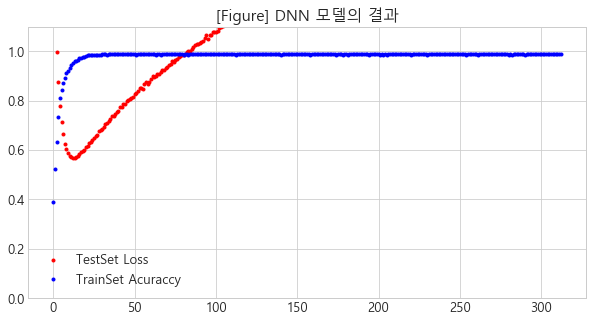

In [28]:
# ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Ïã§Ìóò Í≤∞Í≥ºÏùò Ïò§Ï∞®Í∞íÏùÑ Ï†ÄÏû•
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏúºÎ°ú Ï∏°Ï†ïÌïú Ï†ïÌôïÎèÑÏùò Í∞í Ï†ÄÏû•
y_acc = history.history['accuracy']

# xÍ∞íÏùÑ ÏßÄÏ†ïÌïòÍ≥† Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏
x_len = np.arange(len(y_acc))
plt.title('[Figure] DNN Î™®Îç∏Ïùò Í≤∞Í≥º')
plt.plot( x_len, y_vloss, 'o', c='red', markersize=3, label='TestSet Loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='TrainSet Acuraccy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [29]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_train,y_train)[1])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_test, y_test)[1])

109/109 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.9354
0.9353535175323486
28/28 [==============================] - 0s 2ms/step - loss: 2.5898 - accuracy: 0.6863
0.686274528503418


### 7.2 LSTM

In [30]:
# Î∂àÎü¨Ïò¨ Ï¥ù Îã®Ïñ¥Ïùò Ïàò
word_size = num_word 

In [31]:
padded_x = pad_sequences(X, max_len)  # ÌÜ†ÌÅ∞Ïùò 95%
padded_x

array([[   0,    0,    0, ...,  682,  877,   59],
       [   0,    0,    0, ..., 1661,  107,   59],
       [   0,    0,    0, ...,  301, 1518, 2362],
       ...,
       [   0,    0,    0, ...,  752,   30,  580],
       [   0,    0,    0, ...,  632,  829,   83],
       [   0,    0,    0, ...,    8,  197,  506]])

In [32]:
# LSTM ÏÑ§Ï†ï
model = Sequential()
# Embedding( Î∂àÎü¨Ïò® Îã®Ïñ¥Ïùò Ï¥ù Í∞úÏàò, Í∏∞ÏÇ¨Îãπ Îã®Ïñ¥Ïùò Ïàò) : Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ ÌÜµÌï¥, 
# ÏûÖÎ†•Îêú Í∞íÏùÑ Î∞õÏïÑ Îã§Ïùå Ï∏µÏù¥ ÏïåÏïÑÎì§ÏùÑ Ïàò ÏûàÎäî ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïòÎäî Ïó≠Ìï†
model.add(Embedding( word_size, max_len ) ) 
model.add(LSTM(49, activation='tanh'))
model.add(Dense(5, activation='softmax')) # Îã§Ï§ëÎ∂ÑÎ•ò

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile( loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
             )

# Î™®Îç∏ Ï†ÄÏû• Ï°∞Í±¥ ÏÑ§Ï†ï
model_path = 'model/LSTM_0511_2218/{epoch}-{val_loss}.h5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                               verbose=1,
                               save_best_only=True)
# ÌïôÏäµ ÏûêÎèô Ï§ëÎã® ÏÑ§Ï†ï
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=300)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(padded_x, 
                                                     y_encoded, 
                                                     test_size=0.3, 
                                                     stratify=y_encoded)


# Î™®Îç∏ Ïã§Ìñâ Î∞è Ï†ÄÏû•
history = model.fit( X_train, y_train, validation_split=0.3,
                    epochs=1500,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1500
67/67 [==============================] - 3s 13ms/step - loss: 1.4456 - accuracy: 0.3087 - val_loss: 1.2280 - val_accuracy: 0.5703

Epoch 00001: val_loss improved from inf to 1.22798, saving model to model/LSTM_0511_2218\1-1.2279846668243408.h5
Epoch 2/1500
67/67 [==============================] - 1s 8ms/step - loss: 1.0601 - accuracy: 0.6233 - val_loss: 0.7734 - val_accuracy: 0.7286

Epoch 00002: val_loss improved from 1.22798 to 0.77337, saving model to model/LSTM_0511_2218\2-0.7733738422393799.h5
Epoch 3/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.5926 - accuracy: 0.8102 - val_loss: 0.6903 - val_accuracy: 0.7692

Epoch 00003: val_loss improved from 0.77337 to 0.69026, saving model to model/LSTM_0511_2218\3-0.6902602910995483.h5
Epoch 4/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.4337 - accuracy: 0.8589 - val_loss: 0.7209 - val_accuracy: 0.7604

Epoch 00004: val_loss did not improve from 0.69026
Epoch 5/1500
67/67 [=========

67/67 [==============================] - 1s 9ms/step - loss: 0.0185 - accuracy: 0.9904 - val_loss: 1.5684 - val_accuracy: 0.7275

Epoch 00042: val_loss did not improve from 0.69026
Epoch 43/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0138 - accuracy: 0.9919 - val_loss: 1.6093 - val_accuracy: 0.7374

Epoch 00043: val_loss did not improve from 0.69026
Epoch 44/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0210 - accuracy: 0.9911 - val_loss: 1.6052 - val_accuracy: 0.7264

Epoch 00044: val_loss did not improve from 0.69026
Epoch 45/1500
67/67 [==============================] - 1s 11ms/step - loss: 0.0176 - accuracy: 0.9900 - val_loss: 1.6186 - val_accuracy: 0.7451

Epoch 00045: val_loss did not improve from 0.69026
Epoch 46/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0174 - accuracy: 0.9919 - val_loss: 1.6342 - val_accuracy: 0.7407

Epoch 00046: val_loss did not improve from 0.69026
Epoch 47/1500
67/67 [=================

67/67 [==============================] - 1s 8ms/step - loss: 0.0119 - accuracy: 0.9947 - val_loss: 1.7464 - val_accuracy: 0.7253

Epoch 00084: val_loss did not improve from 0.69026
Epoch 85/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0164 - accuracy: 0.9882 - val_loss: 1.7563 - val_accuracy: 0.7319

Epoch 00085: val_loss did not improve from 0.69026
Epoch 86/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0106 - accuracy: 0.9941 - val_loss: 1.7544 - val_accuracy: 0.7275

Epoch 00086: val_loss did not improve from 0.69026
Epoch 87/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0127 - accuracy: 0.9924 - val_loss: 1.7883 - val_accuracy: 0.7264

Epoch 00087: val_loss did not improve from 0.69026
Epoch 88/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0096 - accuracy: 0.9958 - val_loss: 1.7884 - val_accuracy: 0.7341

Epoch 00088: val_loss did not improve from 0.69026
Epoch 89/1500
67/67 [==================

67/67 [==============================] - 1s 8ms/step - loss: 0.0109 - accuracy: 0.9904 - val_loss: 2.0637 - val_accuracy: 0.7418

Epoch 00126: val_loss did not improve from 0.69026
Epoch 127/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0118 - accuracy: 0.9909 - val_loss: 2.0617 - val_accuracy: 0.7440

Epoch 00127: val_loss did not improve from 0.69026
Epoch 128/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0103 - accuracy: 0.9922 - val_loss: 2.0829 - val_accuracy: 0.7396

Epoch 00128: val_loss did not improve from 0.69026
Epoch 129/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0111 - accuracy: 0.9924 - val_loss: 2.0885 - val_accuracy: 0.7407

Epoch 00129: val_loss did not improve from 0.69026
Epoch 130/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0122 - accuracy: 0.9922 - val_loss: 2.0951 - val_accuracy: 0.7418

Epoch 00130: val_loss did not improve from 0.69026
Epoch 131/1500
67/67 [=============

67/67 [==============================] - 1s 9ms/step - loss: 0.0109 - accuracy: 0.9944 - val_loss: 2.1051 - val_accuracy: 0.7088

Epoch 00168: val_loss did not improve from 0.69026
Epoch 169/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0125 - accuracy: 0.9935 - val_loss: 2.1103 - val_accuracy: 0.7154

Epoch 00169: val_loss did not improve from 0.69026
Epoch 170/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0090 - accuracy: 0.9942 - val_loss: 2.1143 - val_accuracy: 0.7110

Epoch 00170: val_loss did not improve from 0.69026
Epoch 171/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0089 - accuracy: 0.9949 - val_loss: 2.1299 - val_accuracy: 0.7121

Epoch 00171: val_loss did not improve from 0.69026
Epoch 172/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0131 - accuracy: 0.9900 - val_loss: 2.1317 - val_accuracy: 0.7099

Epoch 00172: val_loss did not improve from 0.69026
Epoch 173/1500
67/67 [=============


Epoch 00209: val_loss did not improve from 0.69026
Epoch 210/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0122 - accuracy: 0.9917 - val_loss: 2.3287 - val_accuracy: 0.7209

Epoch 00210: val_loss did not improve from 0.69026
Epoch 211/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0107 - accuracy: 0.9934 - val_loss: 2.3228 - val_accuracy: 0.7220

Epoch 00211: val_loss did not improve from 0.69026
Epoch 212/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0114 - accuracy: 0.9927 - val_loss: 2.3369 - val_accuracy: 0.7220

Epoch 00212: val_loss did not improve from 0.69026
Epoch 213/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0113 - accuracy: 0.9904 - val_loss: 2.3407 - val_accuracy: 0.7220

Epoch 00213: val_loss did not improve from 0.69026
Epoch 214/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0114 - accuracy: 0.9903 - val_loss: 2.3467 - val_accuracy: 0.7242

Epoch 00214: val_lo

67/67 [==============================] - 1s 9ms/step - loss: 0.0076 - accuracy: 0.9937 - val_loss: 2.4954 - val_accuracy: 0.7330

Epoch 00251: val_loss did not improve from 0.69026
Epoch 252/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0119 - accuracy: 0.9916 - val_loss: 2.4812 - val_accuracy: 0.7363

Epoch 00252: val_loss did not improve from 0.69026
Epoch 253/1500
67/67 [==============================] - 1s 10ms/step - loss: 0.0078 - accuracy: 0.9947 - val_loss: 2.4883 - val_accuracy: 0.7341

Epoch 00253: val_loss did not improve from 0.69026
Epoch 254/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0082 - accuracy: 0.9957 - val_loss: 2.4835 - val_accuracy: 0.7352

Epoch 00254: val_loss did not improve from 0.69026
Epoch 255/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0116 - accuracy: 0.9904 - val_loss: 2.5040 - val_accuracy: 0.7352

Epoch 00255: val_loss did not improve from 0.69026
Epoch 256/1500
67/67 [============

67/67 [==============================] - 1s 8ms/step - loss: 0.0123 - accuracy: 0.9896 - val_loss: 2.2022 - val_accuracy: 0.7099

Epoch 00293: val_loss did not improve from 0.69026
Epoch 294/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0161 - accuracy: 0.9872 - val_loss: 2.2097 - val_accuracy: 0.7110

Epoch 00294: val_loss did not improve from 0.69026
Epoch 295/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0145 - accuracy: 0.9872 - val_loss: 2.2158 - val_accuracy: 0.7110

Epoch 00295: val_loss did not improve from 0.69026
Epoch 296/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0127 - accuracy: 0.9893 - val_loss: 2.2213 - val_accuracy: 0.7121

Epoch 00296: val_loss did not improve from 0.69026
Epoch 297/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0080 - accuracy: 0.9945 - val_loss: 2.2287 - val_accuracy: 0.7110

Epoch 00297: val_loss did not improve from 0.69026
Epoch 298/1500
67/67 [=============

In [33]:
# Î™®Îç∏ Íµ¨Ï°∞
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 43)          129000    
_________________________________________________________________
lstm (LSTM)                  (None, 49)                18228     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 250       
Total params: 147,478
Trainable params: 147,478
Non-trainable params: 0
_________________________________________________________________


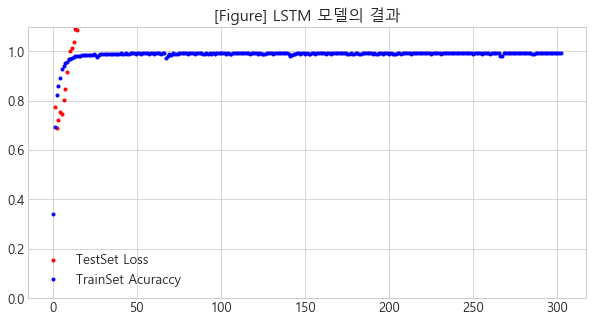

In [34]:
# ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Ïã§Ìóò Í≤∞Í≥ºÏùò Ïò§Ï∞®Í∞íÏùÑ Ï†ÄÏû•
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏúºÎ°ú Ï∏°Ï†ïÌïú Ï†ïÌôïÎèÑÏùò Í∞í Ï†ÄÏû•
y_acc = history.history['accuracy']

# xÍ∞íÏùÑ ÏßÄÏ†ïÌïòÍ≥† Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏
x_len = np.arange(len(y_acc))
plt.title('[Figure] LSTM Î™®Îç∏Ïùò Í≤∞Í≥º')
plt.plot( x_len, y_vloss, 'o', c='red', markersize=3, label='TestSet Loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='TrainSet Acuraccy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [35]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_train,y_train)[1])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_test, y_test)[1])

95/95 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.9096
0.9096305966377258
41/41 [==============================] - 0s 3ms/step - loss: 1.9104 - accuracy: 0.7469
0.7469230890274048


### 7.3 CNN+LSTM

In [36]:
# CNN + LSTM ÏÑ§Ï†ï
model = Sequential()
model.add(Embedding( word_size, max_len ) )
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(5, activation='softmax')) # Îã§Ï§ëÎ∂ÑÎ•ò

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile( loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy']
             )

# Î™®Îç∏ Ï†ÄÏû• Ï°∞Í±¥ ÏÑ§Ï†ï
model_path = 'model/CNN+LSTM_0511_2218/{epoch}-{val_loss}.h5'
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                               verbose=1,
                               save_best_only=True)
# ÌïôÏäµ ÏûêÎèô Ï§ëÎã® ÏÑ§Ï†ï
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=300)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(padded_x, 
                                                     y_encoded, 
                                                     test_size=0.3, 
                                                     stratify=y_encoded)


# Î™®Îç∏ Ïã§Ìñâ Î∞è Ï†ÄÏû•
history = model.fit( X_train, y_train, validation_split=0.3,
                    epochs=1500,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1500
67/67 [==============================] - 3s 12ms/step - loss: 1.4039 - accuracy: 0.3620 - val_loss: 1.0281 - val_accuracy: 0.5791

Epoch 00001: val_loss improved from inf to 1.02806, saving model to model/CNN+LSTM_0511_2218\1-1.0280647277832031.h5
Epoch 2/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.8543 - accuracy: 0.6724 - val_loss: 0.7153 - val_accuracy: 0.7692

Epoch 00002: val_loss improved from 1.02806 to 0.71532, saving model to model/CNN+LSTM_0511_2218\2-0.7153211832046509.h5
Epoch 3/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.4999 - accuracy: 0.8357 - val_loss: 0.6773 - val_accuracy: 0.7692

Epoch 00003: val_loss improved from 0.71532 to 0.67734, saving model to model/CNN+LSTM_0511_2218\3-0.6773353219032288.h5
Epoch 4/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.3603 - accuracy: 0.8866 - val_loss: 0.7029 - val_accuracy: 0.7769

Epoch 00004: val_loss did not improve from 0.67734
Epoch 5/1500
67/6

67/67 [==============================] - 0s 7ms/step - loss: 0.0506 - accuracy: 0.9774 - val_loss: 1.4000 - val_accuracy: 0.7549

Epoch 00042: val_loss did not improve from 0.67734
Epoch 43/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0464 - accuracy: 0.9820 - val_loss: 1.3753 - val_accuracy: 0.7484

Epoch 00043: val_loss did not improve from 0.67734
Epoch 44/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0574 - accuracy: 0.9750 - val_loss: 1.4101 - val_accuracy: 0.7538

Epoch 00044: val_loss did not improve from 0.67734
Epoch 45/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0577 - accuracy: 0.9733 - val_loss: 1.4096 - val_accuracy: 0.7571

Epoch 00045: val_loss did not improve from 0.67734
Epoch 46/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0541 - accuracy: 0.9767 - val_loss: 1.4172 - val_accuracy: 0.7429

Epoch 00046: val_loss did not improve from 0.67734
Epoch 47/1500
67/67 [==================

67/67 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9774 - val_loss: 1.6004 - val_accuracy: 0.7297

Epoch 00084: val_loss did not improve from 0.67734
Epoch 85/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.9778 - val_loss: 1.5992 - val_accuracy: 0.7275

Epoch 00085: val_loss did not improve from 0.67734
Epoch 86/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0510 - accuracy: 0.9762 - val_loss: 1.6244 - val_accuracy: 0.7286

Epoch 00086: val_loss did not improve from 0.67734
Epoch 87/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0443 - accuracy: 0.9794 - val_loss: 1.6100 - val_accuracy: 0.7319

Epoch 00087: val_loss did not improve from 0.67734
Epoch 88/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0479 - accuracy: 0.9752 - val_loss: 1.6247 - val_accuracy: 0.7341

Epoch 00088: val_loss did not improve from 0.67734
Epoch 89/1500
67/67 [==================


Epoch 00125: val_loss did not improve from 0.67734
Epoch 126/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0532 - accuracy: 0.9734 - val_loss: 1.7777 - val_accuracy: 0.7231

Epoch 00126: val_loss did not improve from 0.67734
Epoch 127/1500
67/67 [==============================] - 1s 10ms/step - loss: 0.0491 - accuracy: 0.9774 - val_loss: 1.7927 - val_accuracy: 0.7165

Epoch 00127: val_loss did not improve from 0.67734
Epoch 128/1500
67/67 [==============================] - 1s 10ms/step - loss: 0.0445 - accuracy: 0.9762 - val_loss: 1.7900 - val_accuracy: 0.7209

Epoch 00128: val_loss did not improve from 0.67734
Epoch 129/1500
67/67 [==============================] - 1s 10ms/step - loss: 0.0391 - accuracy: 0.9803 - val_loss: 1.8170 - val_accuracy: 0.7165

Epoch 00129: val_loss did not improve from 0.67734
Epoch 130/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0432 - accuracy: 0.9763 - val_loss: 1.8047 - val_accuracy: 0.7242

Epoch 00130: val


Epoch 00167: val_loss did not improve from 0.67734
Epoch 168/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0516 - accuracy: 0.9752 - val_loss: 1.9428 - val_accuracy: 0.7055

Epoch 00168: val_loss did not improve from 0.67734
Epoch 169/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0483 - accuracy: 0.9758 - val_loss: 1.9469 - val_accuracy: 0.7077

Epoch 00169: val_loss did not improve from 0.67734
Epoch 170/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0408 - accuracy: 0.9816 - val_loss: 1.9387 - val_accuracy: 0.7077

Epoch 00170: val_loss did not improve from 0.67734
Epoch 171/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0429 - accuracy: 0.9817 - val_loss: 1.9464 - val_accuracy: 0.7099

Epoch 00171: val_loss did not improve from 0.67734
Epoch 172/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 0.9755 - val_loss: 1.9542 - val_accuracy: 0.7088

Epoch 00172: val_lo


Epoch 00209: val_loss did not improve from 0.67734
Epoch 210/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0504 - accuracy: 0.9745 - val_loss: 2.0463 - val_accuracy: 0.7000

Epoch 00210: val_loss did not improve from 0.67734
Epoch 211/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9738 - val_loss: 2.0468 - val_accuracy: 0.7000

Epoch 00211: val_loss did not improve from 0.67734
Epoch 212/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9769 - val_loss: 2.0536 - val_accuracy: 0.7033

Epoch 00212: val_loss did not improve from 0.67734
Epoch 213/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0466 - accuracy: 0.9771 - val_loss: 2.0509 - val_accuracy: 0.6967

Epoch 00213: val_loss did not improve from 0.67734
Epoch 214/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0448 - accuracy: 0.9782 - val_loss: 2.0673 - val_accuracy: 0.7000

Epoch 00214: val_lo


Epoch 00251: val_loss did not improve from 0.67734
Epoch 252/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0440 - accuracy: 0.9780 - val_loss: 2.0510 - val_accuracy: 0.6923

Epoch 00252: val_loss did not improve from 0.67734
Epoch 253/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0405 - accuracy: 0.9806 - val_loss: 2.0499 - val_accuracy: 0.6945

Epoch 00253: val_loss did not improve from 0.67734
Epoch 254/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0410 - accuracy: 0.9799 - val_loss: 2.0609 - val_accuracy: 0.6934

Epoch 00254: val_loss did not improve from 0.67734
Epoch 255/1500
67/67 [==============================] - 0s 7ms/step - loss: 0.0393 - accuracy: 0.9810 - val_loss: 2.0647 - val_accuracy: 0.6934

Epoch 00255: val_loss did not improve from 0.67734
Epoch 256/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0392 - accuracy: 0.9825 - val_loss: 2.0659 - val_accuracy: 0.6923

Epoch 00256: val_lo


Epoch 00293: val_loss did not improve from 0.67734
Epoch 294/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0447 - accuracy: 0.9759 - val_loss: 2.2026 - val_accuracy: 0.6879

Epoch 00294: val_loss did not improve from 0.67734
Epoch 295/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0468 - accuracy: 0.9762 - val_loss: 2.2031 - val_accuracy: 0.6901

Epoch 00295: val_loss did not improve from 0.67734
Epoch 296/1500
67/67 [==============================] - 1s 9ms/step - loss: 0.0412 - accuracy: 0.9798 - val_loss: 2.1987 - val_accuracy: 0.6890

Epoch 00296: val_loss did not improve from 0.67734
Epoch 297/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0547 - accuracy: 0.9718 - val_loss: 2.2098 - val_accuracy: 0.6901

Epoch 00297: val_loss did not improve from 0.67734
Epoch 298/1500
67/67 [==============================] - 1s 8ms/step - loss: 0.0506 - accuracy: 0.9692 - val_loss: 2.2119 - val_accuracy: 0.6890

Epoch 00298: val_lo

In [37]:
# CNN+LSTM Î™®Îç∏
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 43)          129000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          13824     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 280       
Total params: 169,504
Trainable params: 169,504
Non-trainable params: 0
_________________________________________________________________


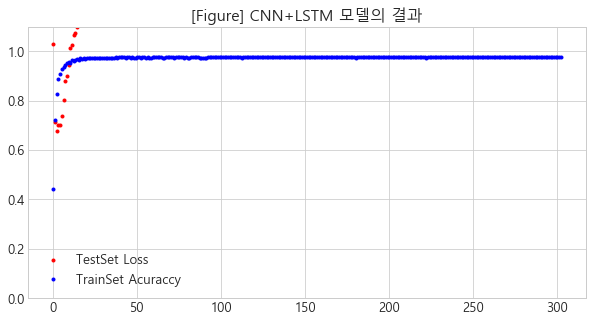

In [38]:
# ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Ïã§Ìóò Í≤∞Í≥ºÏùò Ïò§Ï∞®Í∞íÏùÑ Ï†ÄÏû•
y_vloss = history.history['val_loss']

# ÌïôÏäµÏÖãÏúºÎ°ú Ï∏°Ï†ïÌïú Ï†ïÌôïÎèÑÏùò Í∞í Ï†ÄÏû•
y_acc = history.history['accuracy']

# xÍ∞íÏùÑ ÏßÄÏ†ïÌïòÍ≥† Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏
x_len = np.arange(len(y_acc))
plt.title('[Figure] CNN+LSTM Î™®Îç∏Ïùò Í≤∞Í≥º')
plt.plot( x_len, y_vloss, 'o', c='red', markersize=3, label='TestSet Loss')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3, label='TrainSet Acuraccy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [39]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_train,y_train)[1])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(model.evaluate(X_test, y_test)[1])

95/95 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.8908
0.8908311128616333
41/41 [==============================] - 0s 3ms/step - loss: 2.0208 - accuracy: 0.7015
0.7015384435653687


## 9. Ï†ÄÏû•Ìïú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
- 1. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÍ≥†( 0.74) val_lossÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ LSTM Î™®Îç∏ ÏÇ¨Ïö©
- 2. val_lossÍ∞Ä Í∞ÄÏû• ÎÇÆÏùÄ(0.54) DNNÎèÑ ÏÇ¨Ïö©

In [95]:
best_model = load_model('./model/LSTM_0511_2218/num_words_5000/4-0.6798188090324402.h5')

In [105]:
padded_x = pad_sequences(X, 49)
padded_x # Î∞∞Ïó¥Ïùò Í∏∏Ïù¥Í∞Ä ÎßûÏ∂∞Ïßê

array([[   0,    0,    0, ...,  682,  877,   59],
       [   0,    0,    0, ..., 1661,  107,   59],
       [   0,    0,    0, ..., 1518, 2362, 4249],
       ...,
       [   0,    0,    0, ...,  752,   30,  580],
       [   0,    0,    0, ...,  829, 3269,   83],
       [   0,    0,    0, ...,    8,  197,  506]])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(padded_x, 
                                                     y_encoded, 
                                                     test_size=0.3, 
                                                     stratify=y_encoded)

In [107]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(best_model.evaluate(X_train,y_train)[1])

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print(best_model.evaluate(X_test, y_test)[1])

95/95 [==============================] - 1s 3ms/step - loss: 0.5010 - accuracy: 0.8384
0.8383905291557312
41/41 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8500
0.8500000238418579


## 10. ÌïôÏäµÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌõÑÎ≥¥Ïûê ÏòàÏ∏°

In [108]:
# ÌïôÏäµÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞Ïùò Ïù∏Îç±Ïä§ Î≤àÌò∏
null_idx = df2[df2['candidate'].isnull()].index

# ÏòàÏ∏° ÎåÄÏÉÅÏù∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
docs2 = list(df2.iloc[null_idx]['title_comment'])
len(docs2)

139776

In [109]:
# ÏïûÏÑú ÎßåÎì† ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î°úÎßå Ï±ÑÏõåÏßÑ ÏÉàÎ°úÏö¥ Î∞∞Ïó¥ ÏÉùÏÑ±
X2 = token.texts_to_sequences(docs2) 

In [110]:
print(X2[0])
print(docs2[0])

[785, 68, 70, 36, 1659, 1409, 1006, 959, 145, 1770]
Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Ï≤†ÏàòÏïº Îú∏ Îì§Ïù¥ÏßÄ ÎßêÍ≥† Ïï†Íµ≠ÌïòÎäî ÎßàÏùåÏúºÎ°ú Î¨ºÎü¨ÏÑúÎùº


In [111]:
# Í∏∞Ï°¥ ÌÜ†ÌÅ∞Ïùò Ïù∏Îç±Ïä§Î°ú Ï±ÑÏõåÏßÑ Î∞∞Ïó¥Ïùò Í∞í ÌôïÏù∏
for key, val  in  token.word_index.items():
    if val in [785, 68, 70, 36, 1659, 1409, 1006, 959, 145, 1770]:
        print(key)

Î∞ïÌòïÏ§Ä
Î∂ÄÏÇ∞
ÍπÄÏòÅÏ∂ò
ÎßêÍ≥†
Ïû¨Î≥¥Í∂ê
Ï≤†ÏàòÏïº
ÎåÄÍ≤∞
ÏñëÏûê
ÏÑúÏö∏ÎèÑ
ÎßàÏùåÏúºÎ°ú


In [112]:
# Ìå®Îî©
padded_x2 = pad_sequences(X2, 49)
padded_x2.shape

(139776, 49)

In [113]:
# ÏòàÏ∏°ÌïòÍ∏∞
y_pred_label = np.argmax(best_model.predict(padded_x2), axis = 1)
y_pred_label

array([4, 2, 2, ..., 4, 4, 4], dtype=int64)

In [114]:
# Í≤∞Í≥º ÎîîÏΩîÎî©
y_pred = encoder.inverse_transform(y_pred_label)
y_pred

array(['Ïò§ÏÑ∏Ìõà', 'Î∞ïÏòÅÏÑ†', 'Î∞ïÏòÅÏÑ†', ..., 'Ïò§ÏÑ∏Ìõà', 'Ïò§ÏÑ∏Ìõà', 'Ïò§ÏÑ∏Ìõà'], dtype=object)

In [115]:
y_pred[10]

'Î∞ïÏòÅÏÑ†'

In [116]:
docs2[10]

'Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Ï∞∏ Îãµ ÏóÜÎÑ§ ÌïôÏÉùÎì§ Î∞• Ï£ºÍ∞Ä Ïã´Îã§Í≥† ÏÉùÎñº Î∂ÄÎ¶¨Îã§ Îõ∞Ï≥êÎÇòÍ∞Ñ ÎÜàÏùÑ ÎΩëÍ∏∞ÎèÑ Í∑∏ÎûòÎèÑ'

In [118]:
# Í≤∞Í≥ºÍ∞í ÌôïÏù∏
pd.Series(y_pred).value_counts()

Ïò§ÏÑ∏Ìõà    91797
Î∞ïÏòÅÏÑ†    29648
Í∏∞ÌÉÄ     18157
Î∞ïÌòïÏ§Ä      154
ÍπÄÏòÅÏ∂ò       20
dtype: int64

In [119]:
# ÏòàÏ∏°Ìïú ÌõÑÎ≥¥Í∞í ÎÑ£Í∏∞
df2['area_candidate'][null_idx] = y_pred

In [120]:
df2

area  candidate  candidate_eval  party  party_eval  \
0        NaN        NaN             NaN    NaN         NaN   
1        1.0        1.0             0.0    NaN         NaN   
2        1.0        1.0             0.0    NaN         NaN   
3        1.0        1.0             0.0    1.0         0.0   
4        2.0        NaN             NaN    1.0         0.0   
...      ...        ...             ...    ...         ...   
144134   NaN        NaN             NaN    NaN         NaN   
144135   NaN        NaN             NaN    NaN         NaN   
144136   NaN        NaN             NaN    NaN         NaN   
144137   NaN        NaN             NaN    NaN         NaN   
144138   NaN        NaN             NaN    NaN         NaN   

                                            title_comment area_candidate  
0       Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Ï≤†ÏàòÏïº Îú∏ Îì§Ïù¥ÏßÄ ÎßêÍ≥† Ïï†Íµ≠ÌïòÎäî Îßà...            Ïò§ÏÑ∏Ìõà  
1       Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Î∞ïÏòÅÏÑ†ÏùÄ Ï†ïÎèôÏòÅÏù¥ ÏñªÏùÄ  ÌîÑÎ°ú ÏÑ†Ïóê...            Î∞ïÏòÅÏÑ†  
2       Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Îπµ ÏÇ∞ Ïù¥Í∞Ä ÏÑúÏö∏ÏãúÏû• ÎêòÎ©¥ ÏÑúÏö∏ÏùÄ ...            Î∞ïÏòÅÏÑ†  
3       Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ ÏÑúÏö∏ÏãúÏû• ÌõÑÎ≥¥ Îçî Îì† ÎåÄÏπòÏñ¥ ÏóÜÏùå ...            Î∞ïÏòÅÏÑ†  
4       Ïû¨Î≥¥Í∂ê  Î∂ÄÏÇ∞ ÍπÄÏòÅÏ∂ò  Î∞ïÌòïÏ§Ä ÏÑúÏö∏ÎèÑ ÏñëÏûê ÎåÄÍ≤∞ Î∂ÄÏÇ∞ÏùÄ Ïò§Í±∞Îèà ÏÑ†Í±∞Ïù¥Í≥† Ïò§Í±∞Îèà ÏπòÎ∂Ä...            Î∞ïÏòÅÏÑ†  
...                                                   ...            ...  
144134  ÎÖºÏÑ§ÏúÑÏõêÏùò Îã®ÎèÑÏßÅÏûÖÌïú ÏùºÌï¥Ï†∏ ÌÑ∞ÎÑê Í≤ΩÏ†úÏÑ± ÏóÜÏßÄÎßå ÎèôÎ∂ÅÏïÑ Í≤ΩÏ†úÍ∂å Ï∞®ÏõêÏÑú Ïû•Í∏∞ Í≤ÄÌÜ†Ìï¥Ïïº...            Ïò§ÏÑ∏Ìõà  
144135  ÎÖºÏÑ§ÏúÑÏõêÏùò Îã®ÎèÑÏßÅÏûÖÌïú ÏùºÌï¥Ï†∏ ÌÑ∞ÎÑê Í≤ΩÏ†úÏÑ± ÏóÜÏßÄÎßå ÎèôÎ∂ÅÏïÑ Í≤ΩÏ†úÍ∂å Ï∞®ÏõêÏÑú Ïû•Í∏∞ Í≤ÄÌÜ†Ìï¥Ïïº...            Ïò§ÏÑ∏Ìõà  
144136  ÎÖºÏÑ§ÏúÑÏõêÏùò Îã®ÎèÑ ÏßÅÏûÖÌïú ÏùºÌï¥Ï†Ä ÌÑ∞ÎÑê Í≤ΩÏ†úÏÑ± ÏóÜÏßÄÎßå ÎèôÎ∂ÅÏïÑ Í≤ΩÏ†úÍ∂å Ï∞®ÏõêÏÑú Ïû•Í∏∞ Í≤ÄÌÜ†Ìï¥...            Ïò§ÏÑ∏Ìõà  
144137  ÎÖºÏÑ§ÏúÑÏõêÏùò Îã®ÎèÑ ÏßÅÏûÖÌïú ÏùºÌï¥Ï†Ä ÌÑ∞ÎÑê Í≤ΩÏ†úÏÑ± ÏóÜÏßÄÎßå ÎèôÎ∂ÅÏïÑ Í≤ΩÏ†úÍ∂å Ï∞®ÏõêÏÑú Ïû•Í∏∞ Í≤ÄÌÜ†Ìï¥...            Ïò§ÏÑ∏Ìõà  
144138  ÎÖºÏÑ§ÏúÑÏõêÏùò Îã®ÎèÑÏßÅÏûÖÌïú ÏùºÌï¥Ï†∏ ÌÑ∞ÎÑê Í≤ΩÏ†úÏÑ± ÏóÜÏßÄÎßå ÎèôÎ∂ÅÏïÑ Í≤ΩÏ†úÍ∂å Ï∞®ÏõêÏÑú Ïû•Í∏∞ Í≤ÄÌÜ†Ìï¥Ïïº...            Ïò§ÏÑ∏Ìõà  

[144139 rows x 7 columns]

In [122]:
df2.to_csv('./data/prediction_byModel2/data_byModel2_0512_0054.csv',encoding='utf-8-sig')